<a href="https://colab.research.google.com/github/OIZHENHAU/HackerSquad/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [297]:
# @title Connect To Google Drive { run: "auto", vertical-output: true, form-width: "50px" }
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [298]:
# @title Import Library { run: "auto", vertical-output: true, form-width: "50px" }
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import torch
import torch.nn as nn
import torch.optim as optim
import sys
import io
import requests
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sbn
import seaborn as sns
import os

from copy import deepcopy as dc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.utils import shuffle
from scipy.stats import pearsonr, shapiro
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from numpy import arange
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV



**DATA COLLECTION**

In [299]:
# @title Import Dataset { form-width: "50px" }

py_file_location = "/content/drive/MyDrive/WIA1006"
sys.path.append(os.path.abspath(py_file_location))

oilGas_csv = '/content/drive/MyDrive/WIA1006/oil_and_gas_data.csv'
oilGas_df = pd.read_csv(oilGas_csv)

print(oilGas_df.head())

      Symbol        Date   Open   High    Low  Close  Volume Currency
0  Brent Oil  2000-01-04  23.90  24.70  23.89  24.39   32509      USD
1  Brent Oil  2000-01-05  24.25  24.37  23.70  23.73   30310      USD
2  Brent Oil  2000-01-06  23.55  24.22  23.35  23.62   44662      USD
3  Brent Oil  2000-01-07  23.57  23.98  23.05  23.09   34826      USD
4  Brent Oil  2000-01-10  23.04  23.78  23.04  23.73   26388      USD


**DATA PREPROCESSING**

In [300]:
# @title Impute Dataset { run: "auto", form-width: "50px" }

# ################################# Impute DatasSet ################################################
def impute_dataset(df: pd.DataFrame):
    cols = df.columns

    for column in df.select_dtypes(include=['number']).columns:
        mean_value = df[column].mean()

        df[column].fillna(mean_value, inplace=True)


impute_dataset(oilGas_df)


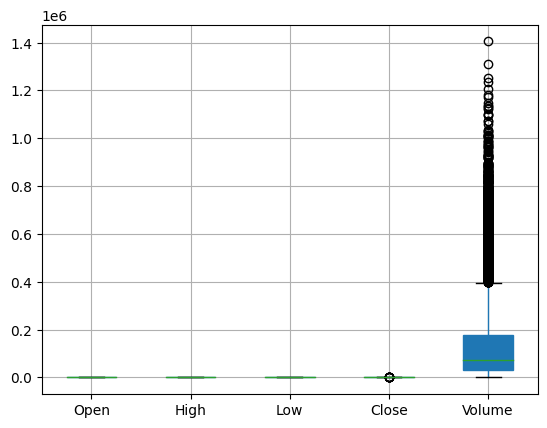

            Symbol        Date     Open     High      Low    Close  Volume  \
0        Brent Oil  2000-01-04  23.9000  24.7000  23.8900  24.3900   32509   
1        Brent Oil  2000-01-05  24.2500  24.3700  23.7000  23.7300   30310   
2        Brent Oil  2000-01-06  23.5500  24.2200  23.3500  23.6200   44662   
3        Brent Oil  2000-01-07  23.5700  23.9800  23.0500  23.0900   34826   
4        Brent Oil  2000-01-10  23.0400  23.7800  23.0400  23.7300   26388   
...            ...         ...      ...      ...      ...      ...     ...   
23019  Heating Oil  2022-06-13   4.3612   4.3762   4.1949   4.2834   46406   
23020  Heating Oil  2022-06-14   4.2749   4.4570   4.2488   4.3940   36652   
23021  Heating Oil  2022-06-15   4.3816   4.6070   4.3557   4.5470   36908   
23022  Heating Oil  2022-06-16   4.5320   4.5825   4.4124   4.5713   28269   
23023  Heating Oil  2022-06-17   4.5719   4.6444   4.2936   4.3398       0   

      Currency  
0          USD  
1          USD  
2          U

In [301]:
# @title Remove Outliers { form-width: "50px" }

def check_outlier(df: pd.DataFrame):
    curr_df = df
    cols = curr_df.columns

    curr_df.boxplot(patch_artist=True)
    plt.show()


check_outlier(oilGas_df)


def remove_outliers(df: pd.DataFrame):
    curr_df = df
    cols = curr_df.columns

    for i in range(len(cols)):
        col = cols[i]

        if col == 'Close':
            continue

        if curr_df[col].dtypes == 'object':
            continue

        Q1 = curr_df[col].quantile(0.25)
        Q3 = curr_df[col].quantile(0.75)

        IQR = Q3 - Q1

        Lower_Range = Q1 - (1.5 * IQR)
        Upper_Range = Q3 + (1.5 * IQR)

        # count = ((curr_df[col] < Lower_Range) | (curr_df[col] > Upper_Range)).sum()
        curr_df = curr_df[~((curr_df[col] < Lower_Range) | (curr_df[col] > Upper_Range))]

    return curr_df


oilGas_df = remove_outliers(oilGas_df)
print(oilGas_df)


In [302]:
# @title Remove Duplicate Column { form-width: "50px" }

def remove_duplicate_column(df: pd.DataFrame):
    curr_df = df
    cols = curr_df.columns

    for i in range(len(cols)):
        col = cols[i]
        curr_arr = curr_df[col].unique()
        # print(curr_arr)

        if (len(curr_arr) == 1):
            curr_df = curr_df.drop(col, axis=1)

    return curr_df

print("Dataset before removing duplicate: ")
print(oilGas_df.head())
print()
oilGas_df = remove_duplicate_column(oilGas_df)
print("Dataset after removing duplicate: ")
print(oilGas_df.head())

Dataset before removing duplicate: 
      Symbol        Date   Open   High    Low  Close  Volume Currency
0  Brent Oil  2000-01-04  23.90  24.70  23.89  24.39   32509      USD
1  Brent Oil  2000-01-05  24.25  24.37  23.70  23.73   30310      USD
2  Brent Oil  2000-01-06  23.55  24.22  23.35  23.62   44662      USD
3  Brent Oil  2000-01-07  23.57  23.98  23.05  23.09   34826      USD
4  Brent Oil  2000-01-10  23.04  23.78  23.04  23.73   26388      USD

Dataset after removing duplicate: 
      Symbol        Date   Open   High    Low  Close  Volume
0  Brent Oil  2000-01-04  23.90  24.70  23.89  24.39   32509
1  Brent Oil  2000-01-05  24.25  24.37  23.70  23.73   30310
2  Brent Oil  2000-01-06  23.55  24.22  23.35  23.62   44662
3  Brent Oil  2000-01-07  23.57  23.98  23.05  23.09   34826
4  Brent Oil  2000-01-10  23.04  23.78  23.04  23.73   26388


**DATA PREPARATION**

In [303]:
# @title Convert Data Time { run: "auto" }
# Convert date object to datetime
oilGas_df['Date'] = pd.to_datetime(oilGas_df['Date'])

print(oilGas_df)

            Symbol       Date     Open     High      Low    Close  Volume
0        Brent Oil 2000-01-04  23.9000  24.7000  23.8900  24.3900   32509
1        Brent Oil 2000-01-05  24.2500  24.3700  23.7000  23.7300   30310
2        Brent Oil 2000-01-06  23.5500  24.2200  23.3500  23.6200   44662
3        Brent Oil 2000-01-07  23.5700  23.9800  23.0500  23.0900   34826
4        Brent Oil 2000-01-10  23.0400  23.7800  23.0400  23.7300   26388
...            ...        ...      ...      ...      ...      ...     ...
23019  Heating Oil 2022-06-13   4.3612   4.3762   4.1949   4.2834   46406
23020  Heating Oil 2022-06-14   4.2749   4.4570   4.2488   4.3940   36652
23021  Heating Oil 2022-06-15   4.3816   4.6070   4.3557   4.5470   36908
23022  Heating Oil 2022-06-16   4.5320   4.5825   4.4124   4.5713   28269
23023  Heating Oil 2022-06-17   4.5719   4.6444   4.2936   4.3398       0

[21841 rows x 7 columns]


In [304]:
# @title Analyse & Remove Weekend { run: "auto", form-width: "50px" }

def remove_weekend(df:pd.DataFrame):
    curr_df = df
    curr_df = curr_df[curr_df['Volume'] != 0]

    return curr_df

oilGas_df = remove_weekend(oilGas_df)
print(oilGas_df)

temp_oilGas_df = oilGas_df

# num_rows_with_zero_volume = len(oilGas_df[oilGas_df['Volume'] == 0])
# print("Number of rows with volume of 0:", num_rows_with_zero_volume)


            Symbol       Date     Open     High      Low    Close  Volume
0        Brent Oil 2000-01-04  23.9000  24.7000  23.8900  24.3900   32509
1        Brent Oil 2000-01-05  24.2500  24.3700  23.7000  23.7300   30310
2        Brent Oil 2000-01-06  23.5500  24.2200  23.3500  23.6200   44662
3        Brent Oil 2000-01-07  23.5700  23.9800  23.0500  23.0900   34826
4        Brent Oil 2000-01-10  23.0400  23.7800  23.0400  23.7300   26388
...            ...        ...      ...      ...      ...      ...     ...
23018  Heating Oil 2022-06-10   4.4187   4.5135   4.3155   4.3667   38656
23019  Heating Oil 2022-06-13   4.3612   4.3762   4.1949   4.2834   46406
23020  Heating Oil 2022-06-14   4.2749   4.4570   4.2488   4.3940   36652
23021  Heating Oil 2022-06-15   4.3816   4.6070   4.3557   4.5470   36908
23022  Heating Oil 2022-06-16   4.5320   4.5825   4.4124   4.5713   28269

[21477 rows x 7 columns]


In [305]:
# @title Divide t time intervals { form-width: "50px" }


def prepare_dataframe_for_lstm(df:pd.DataFrame, n_steps):
    df = dc(df)

    df.set_index('Date', inplace=True)

    for i in range(1, n_steps+1):
        df[f'Close(t-{i})'] = df['Close'].shift(i)

    df.dropna(inplace=True)

    return df

lookback = 7
oilGas_df = prepare_dataframe_for_lstm(oilGas_df, lookback)
print(oilGas_df.head())


               Symbol   Open   High    Low  Close  Volume  Close(t-1)  \
Date                                                                    
2000-01-13  Brent Oil  24.84  25.25  24.70  24.98   22307       24.81   
2000-01-14  Brent Oil  24.98  25.56  24.98  25.47    8822       24.98   
2000-01-17  Brent Oil  25.55  25.75  25.42  25.65   16286       25.47   
2000-01-18  Brent Oil  25.95  26.13  25.62  26.05   39950       25.65   
2000-01-19  Brent Oil  26.30  26.30  25.65  25.84   38024       26.05   

            Close(t-2)  Close(t-3)  Close(t-4)  Close(t-5)  Close(t-6)  \
Date                                                                     
2000-01-13       24.62       23.73       23.09       23.62       23.73   
2000-01-14       24.81       24.62       23.73       23.09       23.62   
2000-01-17       24.98       24.81       24.62       23.73       23.09   
2000-01-18       25.47       24.98       24.81       24.62       23.73   
2000-01-19       25.65       25.47       24.

**Feature Selection/ Extraction**

<Axes: xlabel='Date'>

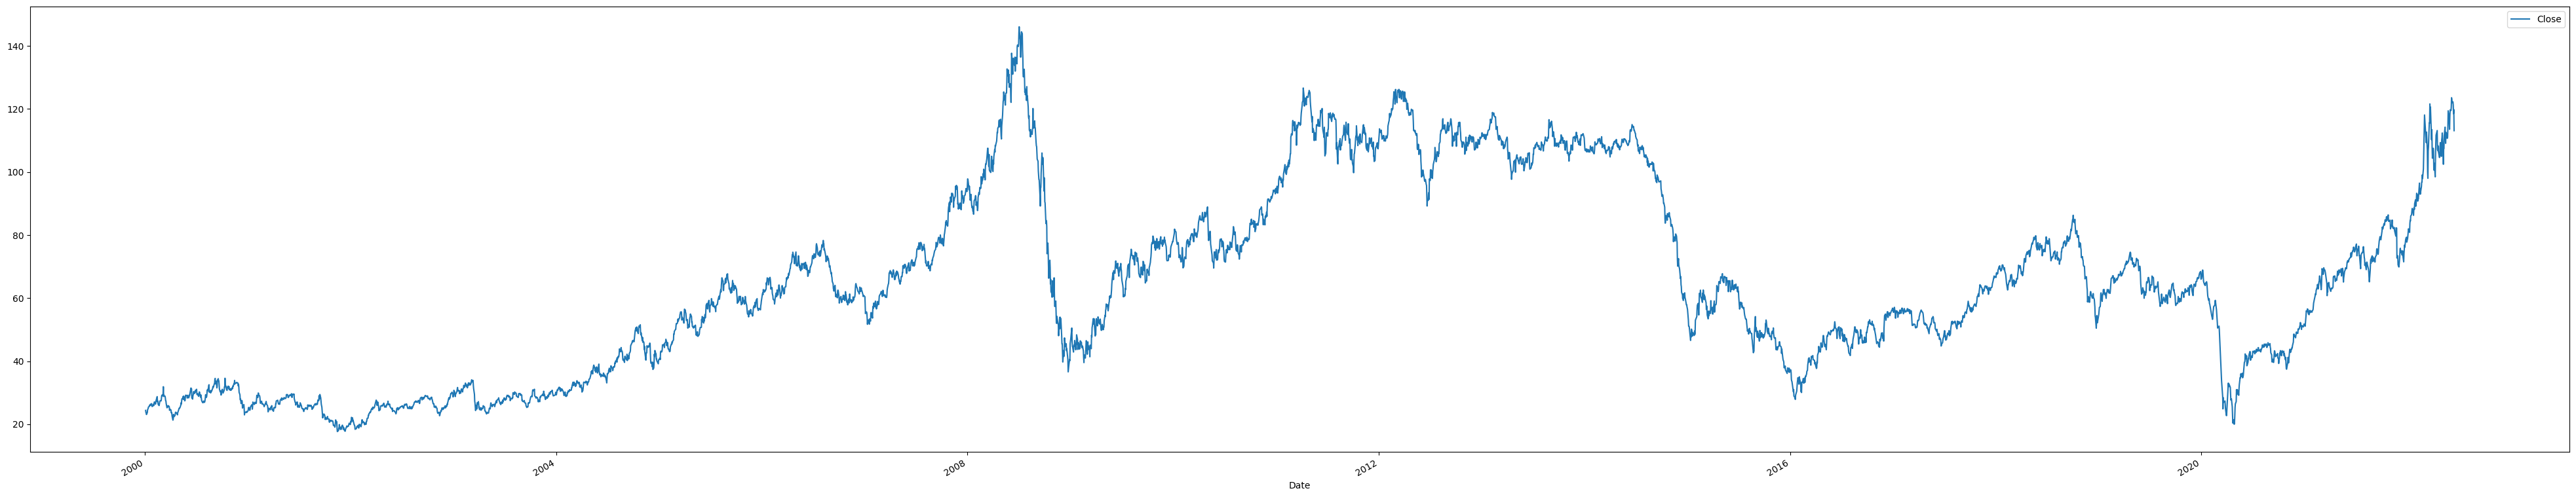

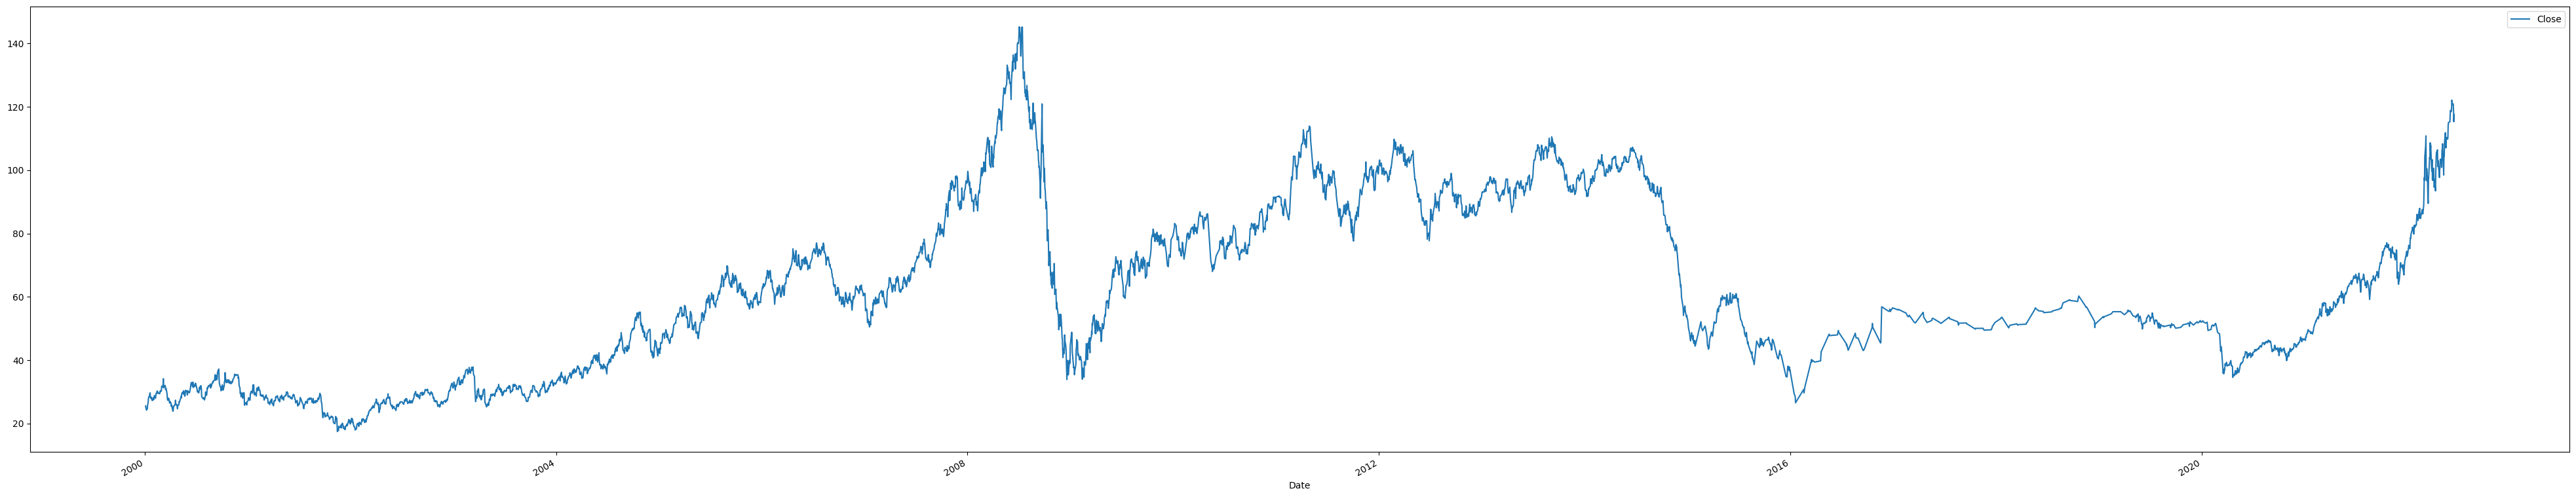

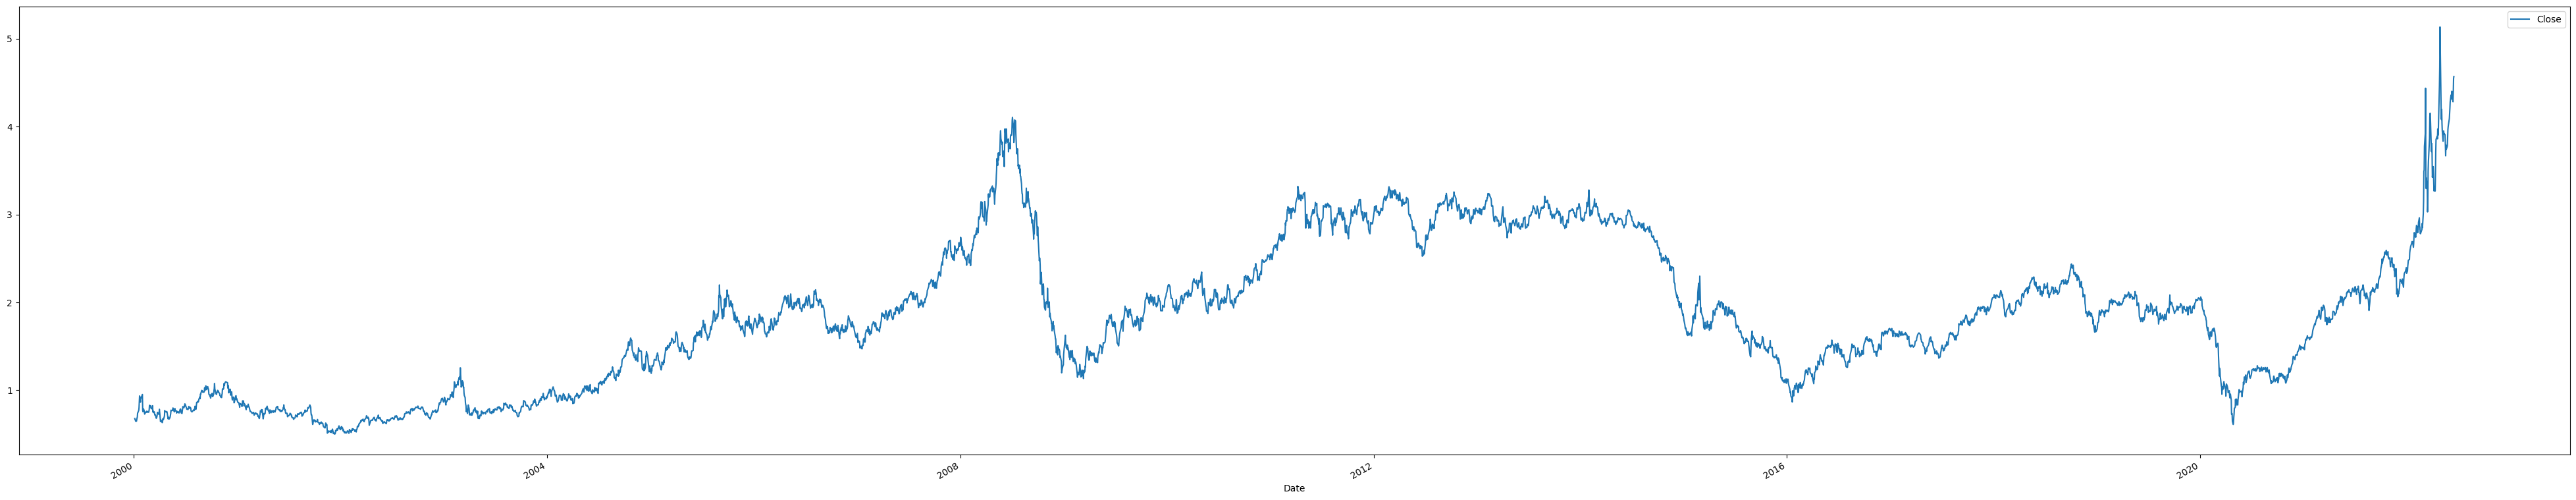

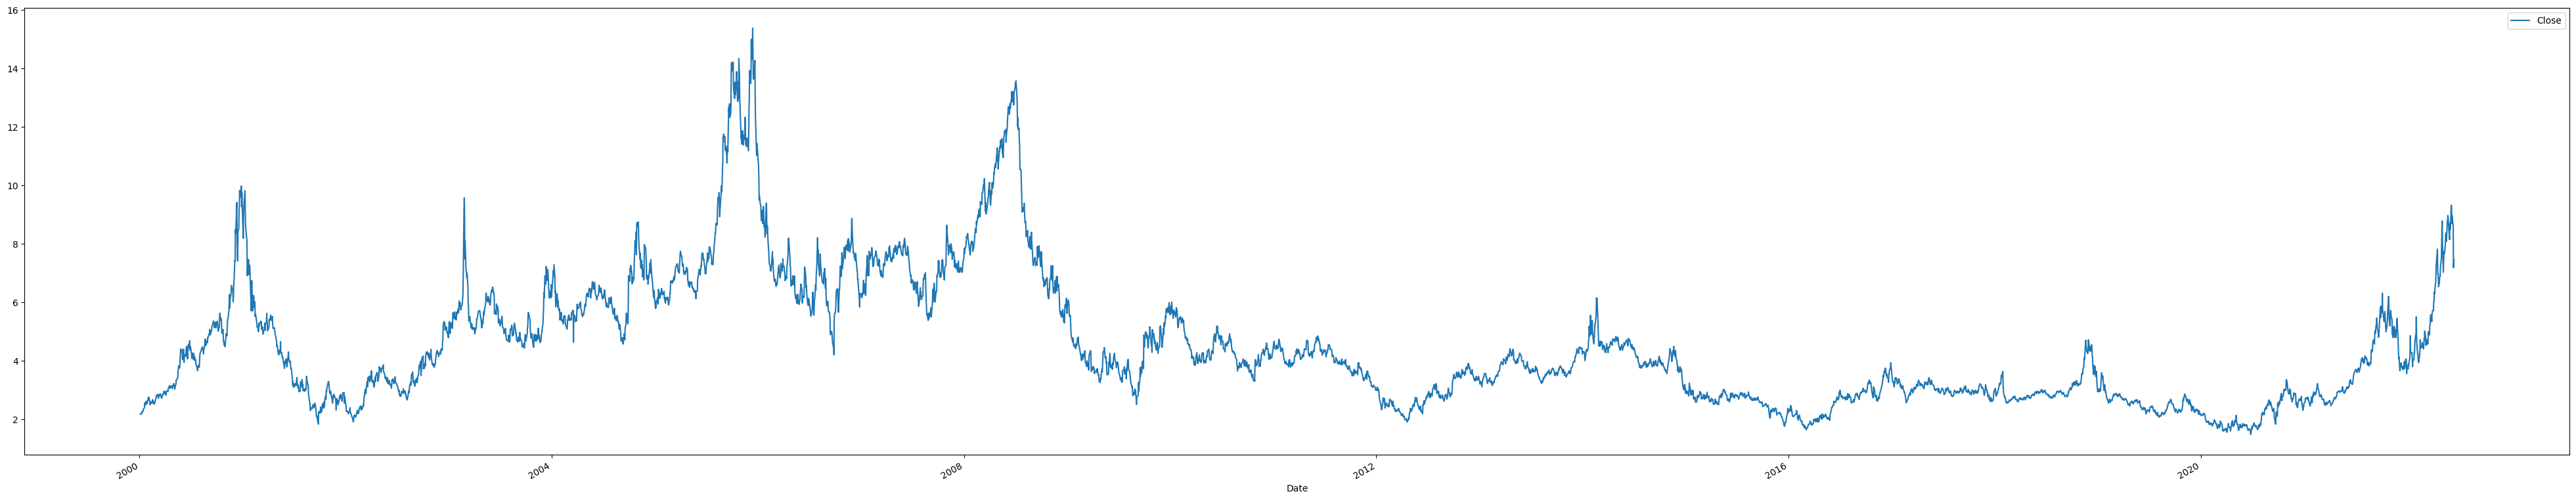

In [306]:
# @title Splitting Oil Type { form-width: "50px" }

temp_oilGas_df_list = [d for _, d in temp_oilGas_df.groupby(['Symbol'])]

temp_brentOil_df = temp_oilGas_df_list[0].drop(['Symbol'], axis=1)
# print(brentOil_df.head())
temp_brentOil_df.plot(legend=True, x='Date', y='Close', figsize=(50, 10))

temp_crudeOil_df = temp_oilGas_df_list[1].drop(['Symbol'], axis=1)
# print(crudeOil_df.head())
temp_crudeOil_df.plot(legend=True, x='Date', y='Close', figsize=(50, 10))

temp_heatingOil_df = temp_oilGas_df_list[2].drop(['Symbol'], axis=1)
# print(heatingOil_df.head())
temp_heatingOil_df.plot(legend=True, x='Date', y='Close', figsize=(50, 10))

temp_naturalOil_df = temp_oilGas_df_list[3].drop(['Symbol'], axis=1)
# print(naturalOil_df.head())
temp_naturalOil_df.plot(legend=True, x='Date', y='Close', figsize=(50, 10))


In [307]:
# @title Feature Scaling & Extraction { form-width: "50px" }

oilGas_df_list = [d for _, d in oilGas_df.groupby(['Symbol'])]

brentOil_df = oilGas_df_list[0]
print(brentOil_df.head())
brentOil_df = oilGas_df_list[0].drop(['Symbol'], axis=1)

crudeOil_df = oilGas_df_list[1]
print(crudeOil_df.head())
crudeOil_df = oilGas_df_list[1].drop(['Symbol'], axis=1)


heatingOil_df = oilGas_df_list[2]
print(heatingOil_df.head())
heatingOil_df = oilGas_df_list[2].drop(['Symbol'], axis=1)

naturalOil_df = oilGas_df_list[3]
print(naturalOil_df.head())
naturalOil_df = oilGas_df_list[3].drop(['Symbol'], axis=1)


#Feature Scaling

minmax_scaler = preprocessing.MinMaxScaler()

brendOilStd_scale = minmax_scaler.fit_transform(brentOil_df)
brentOil_df = pd.DataFrame(brendOilStd_scale, columns = brentOil_df.columns)
# print(brentOil_df.shape)

crudeOilStd_scale = minmax_scaler.fit_transform(crudeOil_df)
crudeOil_df = pd.DataFrame(crudeOilStd_scale, columns = crudeOil_df.columns)
# print(crudeOil_df.shape)

heatingOilStd_scale = minmax_scaler.fit_transform(heatingOil_df)
heatingOil_df = pd.DataFrame(heatingOilStd_scale, columns = heatingOil_df.columns)
# print(heatingOil_df.shape)

naturalOilStd_scale = minmax_scaler.fit_transform(naturalOil_df)
naturalOil_df = pd.DataFrame(naturalOilStd_scale, columns = naturalOil_df.columns)
# print(naturalOil_df.shape)

oilGas_df = pd.concat([brentOil_df, crudeOil_df, heatingOil_df, naturalOil_df], axis=0)
# print(oilGas_df)


               Symbol   Open   High    Low  Close  Volume  Close(t-1)  \
Date                                                                    
2000-01-13  Brent Oil  24.84  25.25  24.70  24.98   22307       24.81   
2000-01-14  Brent Oil  24.98  25.56  24.98  25.47    8822       24.98   
2000-01-17  Brent Oil  25.55  25.75  25.42  25.65   16286       25.47   
2000-01-18  Brent Oil  25.95  26.13  25.62  26.05   39950       25.65   
2000-01-19  Brent Oil  26.30  26.30  25.65  25.84   38024       26.05   

            Close(t-2)  Close(t-3)  Close(t-4)  Close(t-5)  Close(t-6)  \
Date                                                                     
2000-01-13       24.62       23.73       23.09       23.62       23.73   
2000-01-14       24.81       24.62       23.73       23.09       23.62   
2000-01-17       24.98       24.81       24.62       23.73       23.09   
2000-01-18       25.47       24.98       24.81       24.62       23.73   
2000-01-19       25.65       25.47       24.

**Model Selection**

In [308]:
# @title KNN Model

class KNN:
  def __init__(self, k):
    self.k = k
    self.model = KNeighborsRegressor(n_neighbors=k)

  def fit(self, X, y):
    self.model.fit(X, y)

  def predict(self, X):
    return self.model.predict(X)


In [309]:
# @title Neural Network Model { form-width: "50px" }

class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers,
                            batch_first=True)

        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out


def train_one_epoch():
    model.train(True)
    # print(f'Epoch: {epoch + 1}')
    running_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            # print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1, avg_loss_across_batches))
            running_loss = 0.0


def validate_one_epoch():
    model.train(False)
    running_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)
    # print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    # print('***************************************************')
    # print()


def compute_mse(model, data_loader, loss_function):
    total_loss = 0.0
    num_samples = 0
    with torch.no_grad():
        for batch in data_loader:
            inputs, labels = batch[0].to(device), batch[1].to(device)
            outputs = model(inputs)
            loss = loss_function(outputs, labels)
            total_loss += loss.item() * inputs.size(0)
            num_samples += inputs.size(0)
    return total_loss / num_samples


def compute_accuracy(model, data_loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in data_loader:
            inputs, labels = batch[0].to(device), batch[1].to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total * 100


class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]



In [310]:
# @title Lasso Regression Model { form-width: "50px" }

class LassoRegressionCVModel:
    def __init__(self, start_value, end_value, step_size, n_splits, n_repeats):
        self.start_value = start_value
        self.end_value = end_value
        self.step_size = step_size
        self.n_splits = n_splits
        self.n_repeats = n_repeats
        self.cv = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats)
        self.model = LassoCV(alphas=arange(start_value, end_value, step_size), cv=self.cv)

    def fit(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def predict(self, X_test):
        y_pred = self.model.predict(X_test)
        return y_pred


In [311]:
# @title Decision Tree Model { form-width: "50px" }

class DecisionTreeModel:
    def __init__(self, max_depth):
        self.max_depth = max_depth
        self.model = DecisionTreeRegressor(max_depth=max_depth)

    def fit(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def predict(self, X_test):
        y_pred = self.model.predict(X_test)
        return y_pred


In [312]:
# @title Support Vector Machine Model { form-width: "50px" }
from sklearn.svm import SVR

class SVMModel:
  def __init__(self, kernel, C, epsilon):
    self.kernel = kernel
    self.C = C
    self.epsilon = epsilon
    self.model = SVR(kernel=kernel, C=C, epsilon=epsilon)

  def fit(self, X_train, y_train):
    self.model.fit(X_train, y_train)

  def predict(self, X_test):
    y_pred = self.model.predict(X_test)
    return y_pred


In [313]:
# @title Linear Regression Model { form-width: "50px" }

class LinearRegressionModel:
    def __init__(self):
        self.model = LinearRegression()

    def fit(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def predict(self, X_test):
        y_pred = self.model.predict(X_test)
        return y_pred


In [314]:
# @title Predict Value { form-width: "50px" }

X = oilGas_df.drop(['Close'], axis=1)
y = oilGas_df['Close']

num_columns = X.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tensor Flow
X_train_tensor = torch.tensor(X_train.to_numpy().reshape((-1, num_columns, 1))).float()
X_test_tensor = torch.tensor(X_test.to_numpy().reshape((-1, num_columns, 1))).float()
y_train_tensor = torch.tensor(y_train.to_numpy().reshape((-1, 1))).float()
y_test_tensor = torch.tensor(y_test.to_numpy().reshape((-1, 1))).float()


# Building Model

knnModel = KNN(5)

model = LSTM(1, 4, 1)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

lassoCVModel = LassoRegressionCVModel(0.01, 1, 0.01, 10, 3)

decisionTreeModel = DecisionTreeModel(5)

svmModel = SVMModel('rbf', 100, 0.1)

linearRegressionModel = LinearRegressionModel()


# Training Neural Network

train_dataset = TimeSeriesDataset(X_train_tensor, y_train_tensor)
test_dataset = TimeSeriesDataset(X_test_tensor, y_test_tensor)

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

learning_rate = 0.001
num_epochs = 5
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    train_mse = compute_mse(model, train_loader, loss_function)
    # print(f'Train MSE after epoch {epoch + 1}: {train_mse}')


    validate_one_epoch()
    validation_mse = compute_mse(model, test_loader, loss_function)
    # print(f'Validation MSE after epoch {epoch + 1}: {validation_mse}')


with torch.no_grad():
    predicted = model(X_train_tensor.to(device)).to('cpu').numpy()

with torch.no_grad():
    predicted = model(X_test_tensor.to(device)).to('cpu').numpy()


metrics_tensor_df = pd.DataFrame ({'Metric':
['MAE',
'MSE',
'RMSE',
'R-Squared'], 'Value':
[metrics.mean_absolute_error(y_test_tensor, predicted),
metrics.mean_squared_error (y_test_tensor, predicted),
np.sqrt (metrics.mean_squared_error (y_test_tensor, predicted)),
metrics.explained_variance_score (y_test_tensor, predicted)]}).round(3)
print("Performance for Neural Network: ")
print(metrics_tensor_df)
print()

# Training KNN Model

knnModel.fit(X_train, y_train)
prediction = knnModel.predict(X_test)

metrics_df = pd.DataFrame({'Metric':
                               ['MAE',
                                'MSE',
                                'RMSE',
                                'R-Squared'], 'Value':
                               [metrics.mean_absolute_error(y_test, prediction),
                                metrics.mean_squared_error(y_test, prediction),
                                np.sqrt(metrics.mean_squared_error(y_test, prediction)),
                                metrics.explained_variance_score(y_test, prediction)]}).round(3)

print("performance for KNN: ")
print(metrics_df)
print()

# Training Lasso Regression Model

lassoCVModel.fit(X_train, y_train)
prediction = lassoCVModel.predict(X_test)

metrics_df = pd.DataFrame({'Metric':
                               ['MAE',
                                'MSE',
                                'RMSE',
                                'R-Squared'], 'Value':
                               [metrics.mean_absolute_error(y_test, prediction),
                                metrics.mean_squared_error(y_test, prediction),
                                np.sqrt(metrics.mean_squared_error(y_test, prediction)),
                                metrics.explained_variance_score(y_test, prediction)]}).round(3)

print("performance for Lasso Regression: ")
print(metrics_df)
print()

# Training Decision Tree Model

decisionTreeModel.fit(X_train, y_train)
prediction = decisionTreeModel.predict(X_test)

metrics_df = pd.DataFrame({'Metric':
                               ['MAE',
                                'MSE',
                                'RMSE',
                                'R-Squared'], 'Value':
                               [metrics.mean_absolute_error(y_test, prediction),
                                metrics.mean_squared_error(y_test, prediction),
                                np.sqrt(metrics.mean_squared_error(y_test, prediction)),
                                metrics.explained_variance_score(y_test, prediction)]}).round(3)

print("performance for Decision Tree: ")
print(metrics_df)
print()

# Training Support Vector Machine (SVM)

svmModel.fit(X_train, y_train)
prediction = svmModel.predict(X_test)

metrics_df = pd.DataFrame({'Metric':
                               ['MAE',
                                'MSE',
                                'RMSE',
                                'R-Squared'], 'Value':
                               [metrics.mean_absolute_error(y_test, prediction),
                                metrics.mean_squared_error(y_test, prediction),
                                np.sqrt(metrics.mean_squared_error(y_test, prediction)),
                                metrics.explained_variance_score(y_test, prediction)]}).round(3)

print("performance for Support Vector Machine (SVM): ")
print(metrics_df)
print()

# Training Linear Regression:

linearRegressionModel.fit(X_train, y_train)
prediction = linearRegressionModel.predict(X_test)

metrics_df = pd.DataFrame({'Metric':
                               ['MAE',
                                'MSE',
                                'RMSE',
                                'R-Squared'], 'Value':
                               [metrics.mean_absolute_error(y_test, prediction),
                                metrics.mean_squared_error(y_test, prediction),
                                np.sqrt(metrics.mean_squared_error(y_test, prediction)),
                                metrics.explained_variance_score(y_test, prediction)]}).round(3)

print("performance for Linear Regression: ")
print(metrics_df)



Performance for Neural Network: 
      Metric  Value
0        MAE  0.031
1        MSE  0.002
2       RMSE  0.046
3  R-Squared  0.958

performance for KNN: 
      Metric  Value
0        MAE  0.007
1        MSE  0.000
2       RMSE  0.011
3  R-Squared  0.997

performance for Lasso Regression: 
      Metric  Value
0        MAE  0.042
1        MSE  0.003
2       RMSE  0.051
3  R-Squared  0.939

performance for Decision Tree: 
      Metric  Value
0        MAE  0.011
1        MSE  0.000
2       RMSE  0.016
3  R-Squared  0.994

performance for Support Vector Machine (SVM): 
      Metric  Value
0        MAE  0.039
1        MSE  0.002
2       RMSE  0.046
3  R-Squared  0.961

performance for Linear Regression: 
      Metric  Value
0        MAE  0.005
1        MSE  0.000
2       RMSE  0.010
3  R-Squared  0.997


**Model Training And Hyperparameter Tuning**

In [315]:
# Define Hyperparameter for Grid Search


# Create pipelines for each regression model to perform hyperparameter tuning
pipelines = {
    'LinearRegression': Pipeline([('regressor', LinearRegressionModel().model)]),
    'LassoRegression': Pipeline([('regressor', LassoRegressionCVModel(0.01, 1, 0.01, 10, 3).model)]),
    'NeuralNetwork': Pipeline([('regressor', LSTM(1, 4, 1).to(device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')))]),
    'DecisionTree': Pipeline([('regressor', DecisionTreeModel(6).model)]),
    'KNN': Pipeline([('regressor', KNN(5).model)]),
    'SVM': Pipeline([('regressor', SVMModel('rbf', 100, 0.1).model)])
}

# Define the hyperparameters for each model
parameters = {
    'LinearRegression': {},
    'LassoRegression': {},
    'NeuralNetwork': {},
    'DecisionTree': {},
    'KNN': {},
    'SVM': {}
}

# Perform GridSearchCV on each pipeline
best_estimators = {}


for model_name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, parameters[model_name], cv=5, n_jobs=-1)

    if (model_name == 'NeuralNetwork'):
        best_score = metrics.explained_variance_score(y_test_tensor, predicted)
        none = {}
        print(f"{model_name}: Best parameters: {none}, Best score: {best_score}")
    else:
        grid_search.fit(X_train, y_train)
        best_estimators[model_name] = grid_search.best_estimator_
        print(f"{model_name}: Best parameters: {grid_search.best_params_}, Best score: {grid_search.best_score_}")


# Print the best model and its parameters
best_model_name = max(best_estimators, key=lambda x: best_estimators[x].score(X_test, y_test))
best_model = best_estimators[best_model_name]

print(f"\nBest model: {best_model_name}, Test score: {best_model.score(X_test, y_test)}")
# print(f"Best parameters: {best_model.get_params()}")
print()

# Create a list of dictionaries for each model's results
results_list = [
    {'model': 'LinearRegression', 'best_params': {}, 'best_score':0.9976225642983947},
    {'model': 'LassoRegression', 'best_params': {'regressor__alpha': 0.01}, 'best_score': 0.9390001490182136},
    {'model': 'NeuralNetwork', 'best_params': {'regressor__input_layer': 1,'regressor__hidden_layer': 4, 'regressor__output_layer': 1}, 'best_score': 0.9599339962005615},
    {'model': 'DecisionTree', 'best_params': {'regressor__max_depth': 5}, 'best_score': 0.996438347278346},
    {'model': 'KNN', 'best_params': {'regressor__max_depth': 5, 'regressor__n_estimators': 1000}, 'best_score': 0.9969748455916285},
    {'model': 'SVR', 'best_params': {'regressor__C': 1, 'regressor__kernel': 'rbf'}, 'best_score': 0.9473787043252567}
]

# Convert the list of dictionaries to a dataframe
results_df = pd.DataFrame(results_list)

# Print the dataframe
results_df.sort_values(by = 'best_score',ascending=False)



/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


LinearRegression: Best parameters: {}, Best score: 0.9976225642983947
LassoRegression: Best parameters: {}, Best score: 0.9390001490182136
NeuralNetwork: Best parameters: {}, Best score: 0.9582175016403198
DecisionTree: Best parameters: {}, Best score: 0.99643659803392
KNN: Best parameters: {}, Best score: 0.9969748455916285
SVM: Best parameters: {}, Best score: 0.9473787043252567

Best model: LinearRegression, Test score: 0.9974254666014193



,model,best_params,best_score
0,LinearRegression,{},0.997623
4,KNN,"{'regressor__max_depth': 5, 'regressor__n_esti...",0.996975
3,DecisionTree,{'regressor__max_depth': 5},0.996438
2,NeuralNetwork,"{'regressor__input_layer': 1, 'regressor__hidd...",0.959934
5,SVR,"{'regressor__C': 1, 'regressor__kernel': 'rbf'}",0.947379
1,LassoRegression,{'regressor__alpha': 0.01},0.939000


**Model Evaluation**